Vamos a listar las "jotas", es decir, el índice de las coordenadas totales, siguiendo este orden: de la esquina inferior [1,1], ese será j=1, luego j=2 corresponderá a [1,2], j=64 será [1,64] y luego j=65 será [2,1]. Recuerda que esto está ordenado como MATRICES, entonces j=5, [1,5]  es el lugar coordenada x=5 y y=1. Respeta el orden y todo saldrá bien.

In [1]:
ConjuntoDeCoordenadasTotal=Array[]

0-element Array{Array{T,N},1}

Por cierto, estoy SEGURO que esta NO es la forma más inteligente de hacerlo, pero funciona. Ya después optimizamos.

In [2]:
for j=1:64,k=1:64
    push!(ConjuntoDeCoordenadasTotal,[j,k])
end


2-element Array{Int64,1}:
 2
 1

In [6]:
BceroDura=readdlm("BceroDura.dat");
BceroSuave=readdlm("BceroSuave.dat")
btildedura=readdlm("BtildeDuraCero.dat")
btildesuave=readdlm("BtildeSuaveCero.dat");

In [10]:
BceroSuave[64,64]=393.105 #Convergencia, hay que checar el notebook anterior y ver porque pasa eso...

393.105

In [6]:
BceroDura[64,64]=137.089 #Correccion por convergencia, hay que checar el notebook anterior y ver porque pasa eso...

137.089

In [16]:
addprocs(11)

11-element Array{Int64,1}:
 13
 14
 15
 16
 17
 18
 19
 20
 21
 22
 23

Esta parte de abajo debe ser trivialmente paralelizable, ¿no?

In [13]:
jmax=128
xconstante=[64,64]
Kduras=zeros(jmax,jmax);
@time for j=1:jmax
     xj=ConjuntoDeCoordenadasTotal[j]
     for k=1:j
            xk=ConjuntoDeCoordenadasTotal[k]
        for l=1:jmax
            xl=ConjuntoDeCoordenadasTotal[l]
            Kduras[j,k]+=BceroDura[(xk-xl+xconstante)...]*BceroDura[(xj-xl+xconstante)...]
            end
    end
end

  2.780765 seconds (25.38 M allocations: 919.637 MB, 3.45% gc time)


In [15]:
function obtenerKernelParalell(LasB::Array, lasX::Array, jmax::Int)
    result=SharedArray(Float64,jmax,jmax)
    @sync @parallel for j=1:jmax
        xj=lasX[j]
         for k=1:j
            xk=lasX[k]
         for l=1:jmax
                xl=lasX[l]
                result[j,k]+= LasB[(xk-xl+xconstante)...]*LasB[(xj-xl+xconstante)...]
        end
  #  println("hola loco ", KdurasParalel[j,k])
        end
    end 
    
end

function obtenerKtildeParalell(LasB::Array,LasBTilde::Array, lasX::Array, jmax::Int)
    result=SharedArray(Float64,jmax,jmax)
    @sync @parallel for j=1:jmax
        xj=lasX[j]
         for k=1:j
            xk=lasX[k]
         for l=1:jmax
                xl=lasX[l]
                result[j,k]+= LasB[(xk-xl+xconstante)...]*LasB[(xj-xl+xconstante)...]
        end
  #  println("hola loco ", KdurasParalel[j,k])
        end
    end 
    
end
    

obtenerKernelParalell (generic function with 1 method)

In [ ]:
@time KSuaveParalel=obtenerKernelParalell(BceroSuave, ConjuntoDeCoordenadasTotal,4096);

In [26]:
writedlm("KSuavesParalel.dat", KSuaveParalel)

procs (generic function with 3 methods)

In [10]:
jmax=4096
KdurasParalel=SharedArray(Float64, jmax,jmax)

@time @sync @parallel for j=1:jmax
     xj=ConjuntoDeCoordenadasTotal[j]
     for k=1:j
            xk=ConjuntoDeCoordenadasTotal[k]

         for l=1:jmax
            xl=ConjuntoDeCoordenadasTotal[l]
            KdurasParalel[j,k]+= BceroDura[(xk-xl+xconstante)...]*BceroDura[(xj-xl+xconstante)...]
         
       
        end
  #  println("hola loco ", KdurasParalel[j,k])
    end
end 

20395.665847 seconds (2.46 M allocations: 128.908 MB, 0.00% gc time)


11-element Array{Any,1}:
 RemoteRef{Channel{Any}}(2,1,34) 
 RemoteRef{Channel{Any}}(3,1,35) 
 RemoteRef{Channel{Any}}(4,1,36) 
 RemoteRef{Channel{Any}}(5,1,37) 
 RemoteRef{Channel{Any}}(6,1,38) 
 RemoteRef{Channel{Any}}(7,1,39) 
 RemoteRef{Channel{Any}}(8,1,40) 
 RemoteRef{Channel{Any}}(9,1,41) 
 RemoteRef{Channel{Any}}(10,1,42)
 RemoteRef{Channel{Any}}(11,1,43)
 RemoteRef{Channel{Any}}(12,1,44)

In [12]:
writedlm("KDurasParalel.dat", KdurasParalel)

In [22]:
Kcasero=readdlm("/home/karel/Downloads/KDurasParalel.dat");

In [23]:
Kcasero-KdurasParalel

4096x4096 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [14]:
using PyPlot

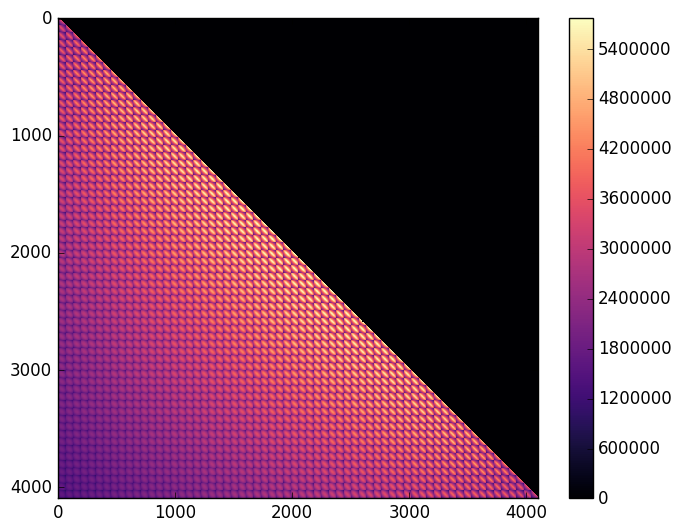

PyObject <matplotlib.colorbar.Colorbar object at 0x7f22086e9ef0>

In [16]:
ion()
figuru=imshow(KdurasParalel, origin="upper",interpolation="nearest",cmap="magma") 
cb=colorbar(figuru)

Hay algo raro... me está saliendo Ciclica la integral... ¿tiene sentido?

4096x4096 Array{Float64,2}:
 4.09898e6  2.12035e6  2.18286e6  …  1.01829e6  1.00005e6  9.81588e5
 2.12035e6  4.39177e6  2.26297e6     1.03724e6  1.01876e6  1.00005e6
 2.18286e6  2.26297e6  4.66969e6     1.05595e6  1.03724e6  1.01829e6
 2.23504e6  2.3194e6   2.39603e6     1.07426e6  1.05531e6  1.03612e6
 2.2754e6   2.3635e6   2.44462e6     1.092e6    1.07283e6  1.05341e6
 2.30331e6  2.39445e6  2.47957e6  …  1.10908e6  1.08969e6  1.07005e6
 2.31999e6  2.41335e6  2.50178e6     1.1255e6   1.10589e6  1.08604e6
 2.32745e6  2.42213e6  2.513e6       1.14131e6  1.12149e6  1.10142e6
 2.32753e6  2.42263e6  2.51502e6     1.15653e6  1.13651e6  1.11624e6
 2.32181e6  2.41654e6  2.50952e6     1.1712e6   1.15099e6  1.13052e6
 2.31164e6  2.40532e6  2.49806e6  …  1.18536e6  1.16496e6  1.1443e6 
 2.29808e6  2.39021e6  2.48204e6     1.19902e6  1.17844e6  1.15759e6
 2.28196e6  2.37221e6  2.46261e6     1.21219e6  1.19144e6  1.17041e6
 ⋮                                ⋱                        ⋮        
 1.157

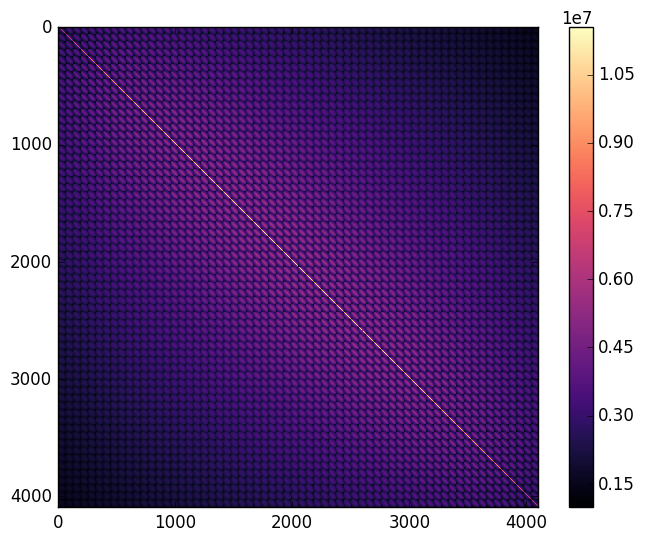

PyObject <matplotlib.colorbar.Colorbar object at 0x7f21fc5aa160>

In [19]:
figuru=imshow(KTotal, origin="upper",interpolation="nearest",cmap="magma") 
cb=colorbar(figuru)